In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score, root_mean_squared_error
from sklearn.model_selection import train_test_split

In [2]:
df = sns.load_dataset('mpg')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [3]:
# regresión lineal simple para predecir la columna mpg
# df.isna().sum()
# df.shape
df.dropna(inplace=True)

In [4]:
X = df[['horsepower']]
y = df['mpg']

model = LinearRegression()

model.fit(X, y)
y_pred = model.predict(df[['horsepower']])

print(f'r2: {r2_score(y, y_pred)}')
print(f'MAE: {mean_absolute_error(y, y_pred)}')
print(f'RMSE: {root_mean_squared_error(y, y_pred)}')

r2: 0.6059482578894348
MAE: 3.8275871459582205
RMSE: 4.893226230065713


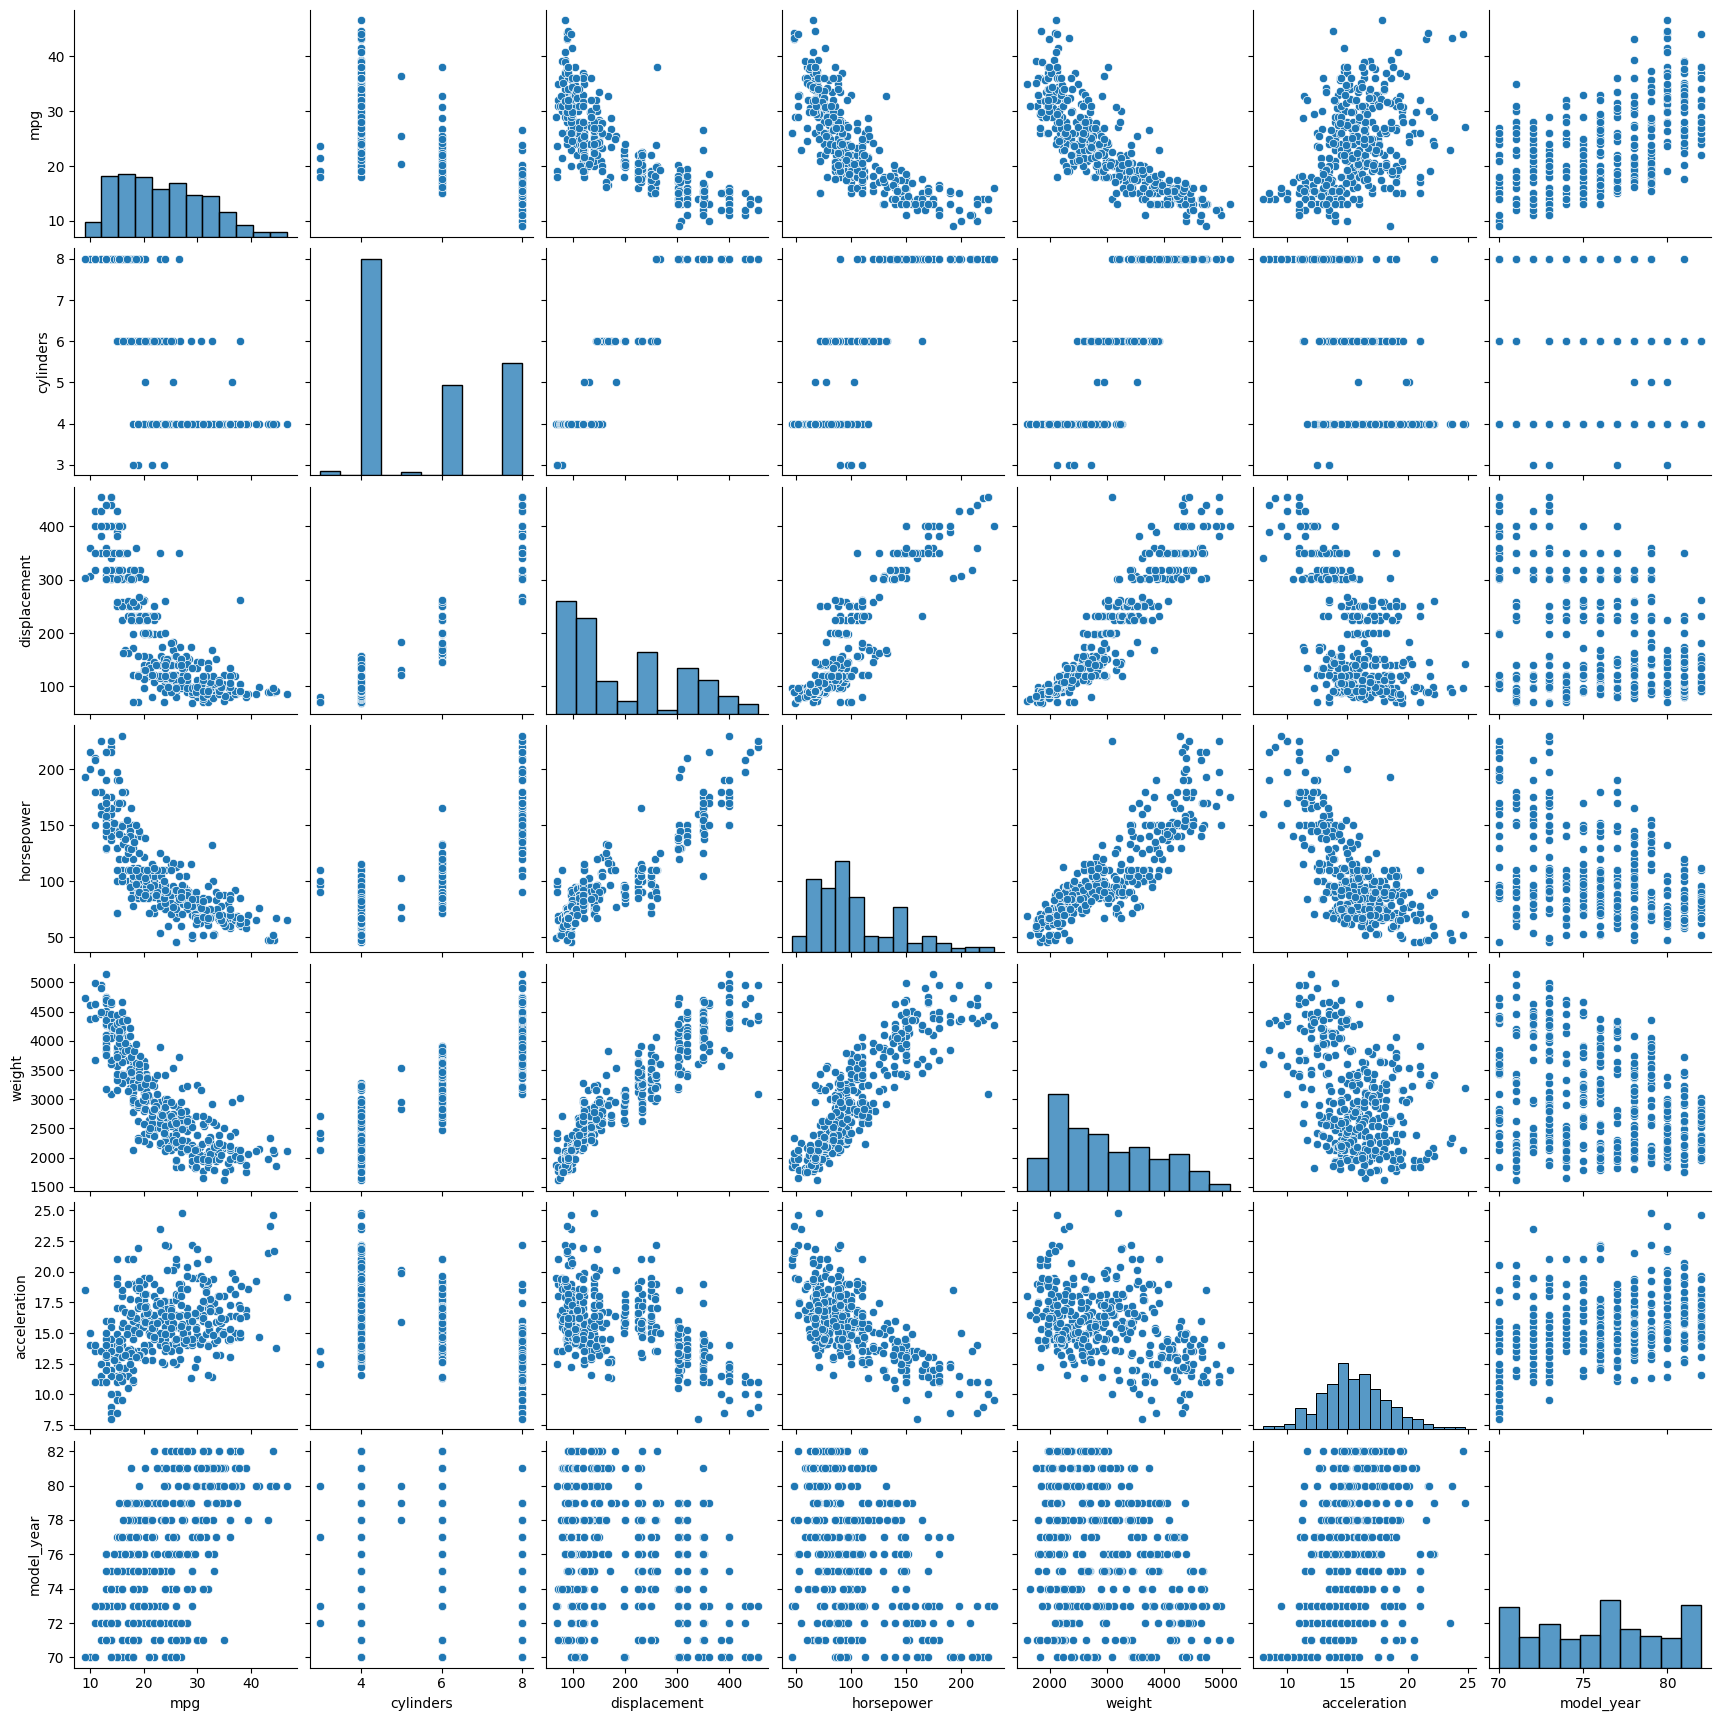

In [5]:
# Opción 1: investigar con EDAs qué columnas podrían ser las mejores para predecir mpg
# pairplot
# corr y heatmap
sns.pairplot(df)

<Axes: >

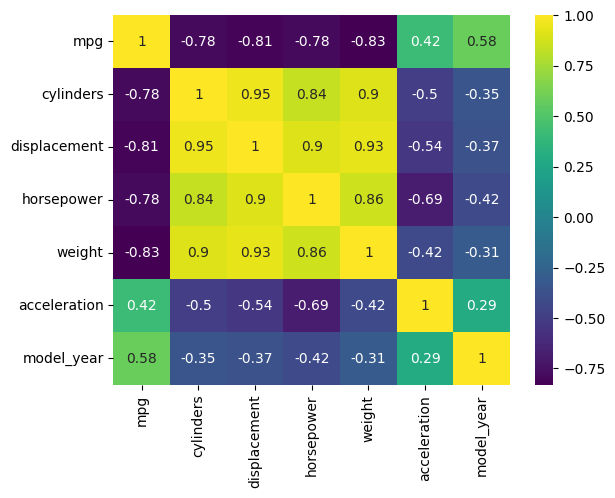

In [6]:
sns.heatmap(df.corr(numeric_only=True).round(2), annot=True, cmap='viridis' )

C:\Users\alanj\AppData\Local\Temp\ipykernel_21020\1708014388.py:27: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_resultados = pd.concat([df_resultados, df_resultados_predictor], ignore_index=True)


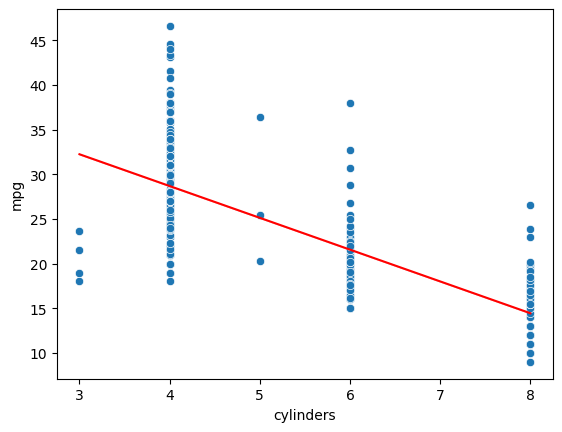

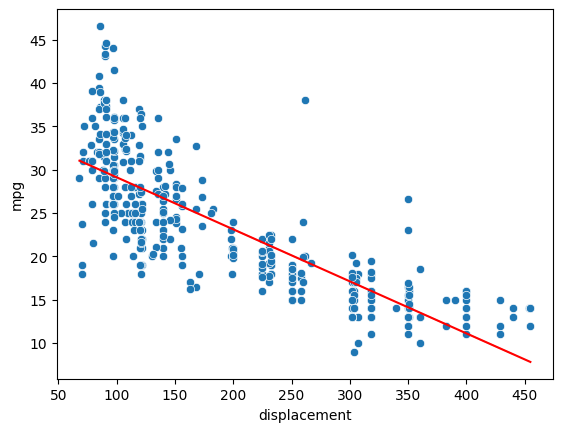

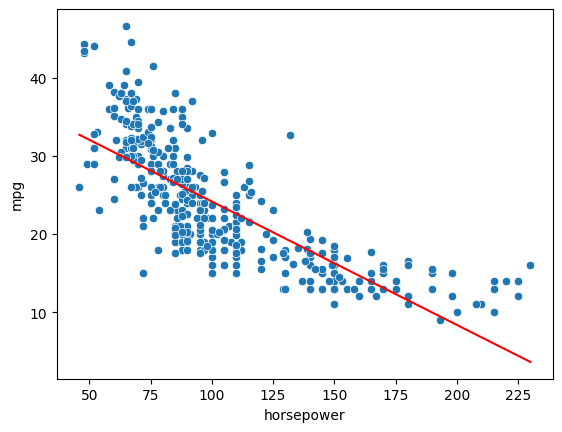

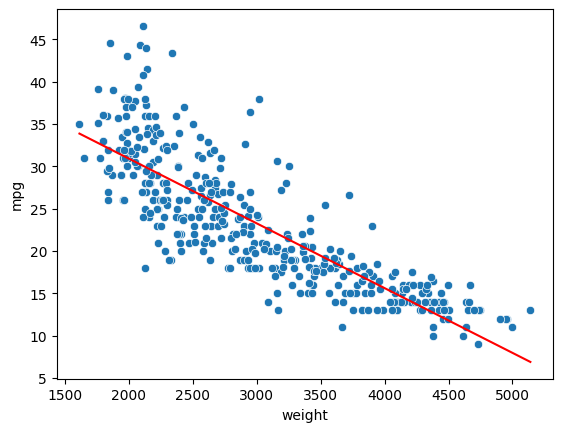

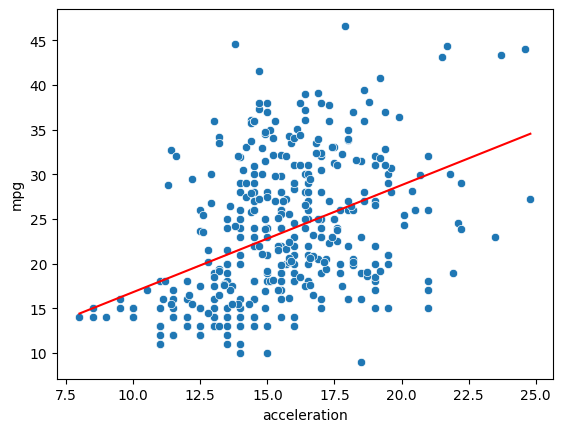

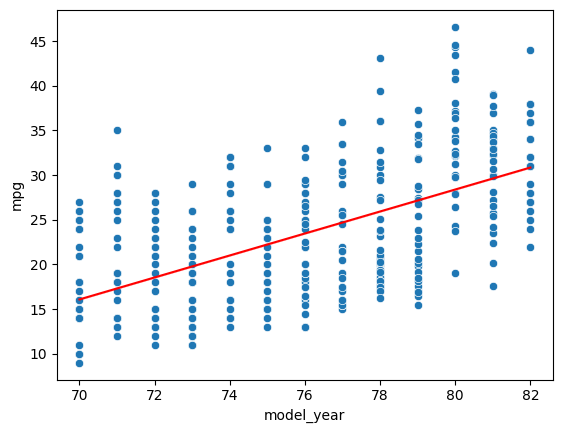

In [7]:
# Opción 2: bucle for que itere todas las columnas numéricas y las use una por una como X
# almacenando resultados en un DF
df_resultados = pd.DataFrame(columns=['Modelo', 'R2', 'MAE', 'RMSE'])

predictores = ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year']

for predictor in predictores:
    X = df[[predictor]]
    y = df['mpg']
    
    model = LinearRegression()
    model.fit(X, y)
    
    y_pred = model.predict(X)
    
    r2 = r2_score(y, y_pred)
    mae = mean_absolute_error(y, y_pred)
    rmse = root_mean_squared_error(y, y_pred)
    
    df_resultados_predictor = pd.DataFrame({
        'Modelo': f'RLS {predictor}',
        'R2': [r2],
        'MAE': [mae],
        'RMSE': [rmse]
    })
    
    df_resultados = pd.concat([df_resultados, df_resultados_predictor], ignore_index=True)
    
    # opcional, mostrar cada una de las regresiones lineales simples
    sns.scatterplot(x=X[predictor], y=y)
    sns.lineplot(x=X[predictor], y=y_pred, c='r')
    plt.show()

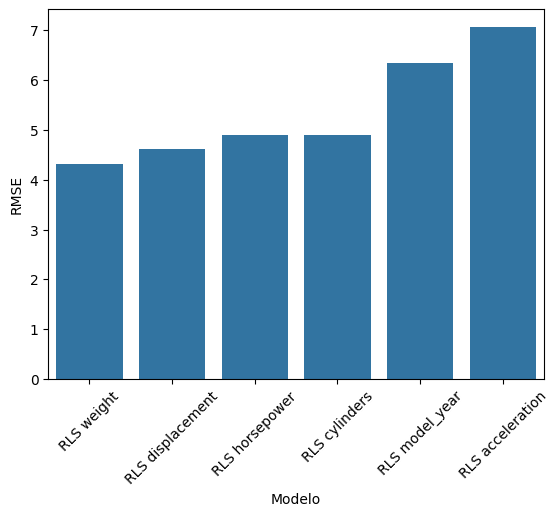

In [8]:

sns.barplot(df_resultados.sort_values('RMSE'), x='Modelo', y='RMSE')
plt.xticks(rotation=45);

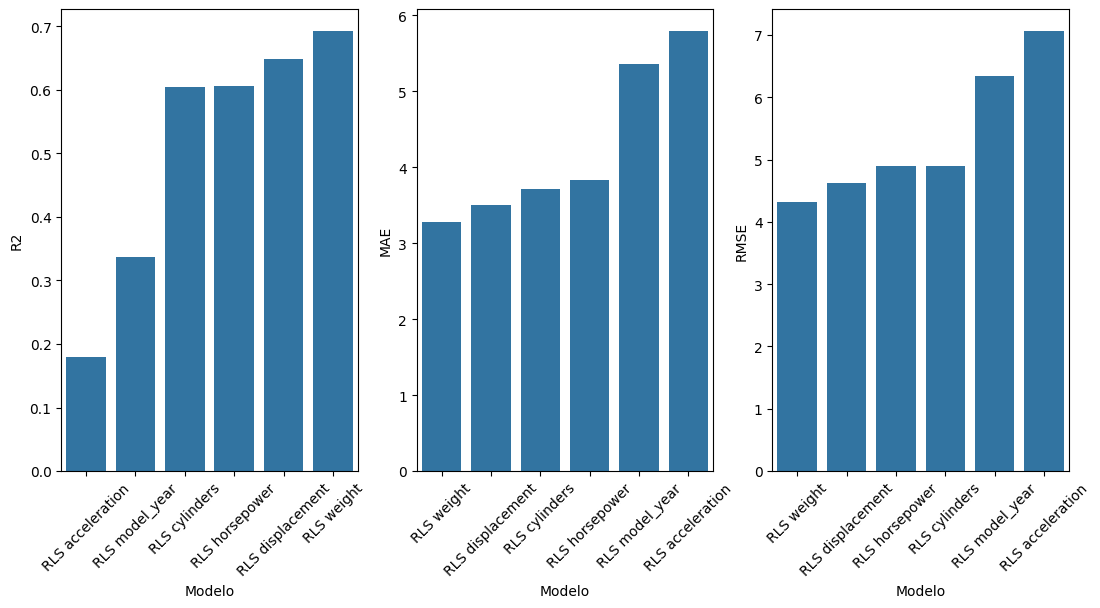

In [9]:
plt.figure(figsize=(13, 6))
plt.subplot(1, 3, 1)
sns.barplot(df_resultados.sort_values('R2'), x='Modelo', y='R2') #interesa valor mas alto
plt.xticks(rotation=45)
plt.subplot(1, 3, 2)
sns.barplot(df_resultados.sort_values('MAE'), x='Modelo', y='MAE') #interesa valor mas bajo
plt.xticks(rotation=45)
plt.subplot(1, 3, 3)
sns.barplot(df_resultados.sort_values('RMSE'), x='Modelo', y='RMSE')
plt.xticks(rotation=45);

In [10]:
# regresión lineal múltiple para predecir la columna mpg
# Seleccionar la X, y
# X = df[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year']]
X = df.drop(['mpg', 'origin', 'name'], axis=1) # equivalente al anterior
y = df['mpg']

model = LinearRegression()

model.fit(X, y)

y_pred = model.predict(X)

r2 = r2_score(y, y_pred)
mae = mean_absolute_error(y, y_pred)
rmse = root_mean_squared_error(y, y_pred)

df_resultados_predictor = pd.DataFrame({
    'Modelo': f'RL múltiple',
    'R2': [r2],
    'MAE': [mae],
    'RMSE': [rmse]
})

df_resultados = pd.concat([df_resultados, df_resultados_predictor], ignore_index=True)
df_resultados

,Modelo,R2,MAE,RMSE
0,RLS cylinders,0.604689,3.711287,4.901039
1,RLS displacement,0.648229,3.506273,4.623261
2,RLS horsepower,0.605948,3.827587,4.893226
3,RLS weight,0.692630,3.278702,4.321645
4,RLS acceleration,0.179207,5.795118,7.062126
5,RLS model_year,0.337028,5.355736,6.346968
6,RL múltiple,0.809255,2.618264,3.404434


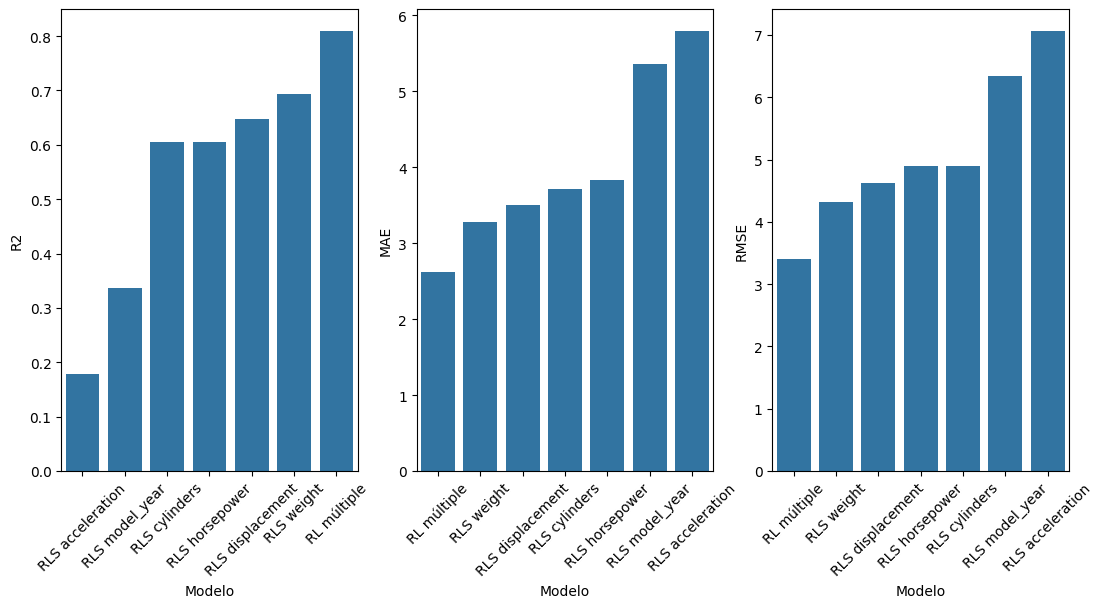

In [11]:
plt.figure(figsize=(13, 6))
plt.subplot(1, 3, 1)
sns.barplot(df_resultados.sort_values('R2'), x='Modelo', y='R2') #interesa valor mas alto
plt.xticks(rotation=45)
plt.subplot(1, 3, 2)
sns.barplot(df_resultados.sort_values('MAE'), x='Modelo', y='MAE') #interesa valor mas bajo
plt.xticks(rotation=45)
plt.subplot(1, 3, 3)
sns.barplot(df_resultados.sort_values('RMSE'), x='Modelo', y='RMSE')
plt.xticks(rotation=45);

In [12]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [13]:
# get_dummies: origin
# Crear una regresión lineal múltiple utilizando las siguientes columnas en la entrada X:
# cylinders	displacement	horsepower	weight	acceleration	model_year	origin_usa origin_japan origin_europe
df_dummies = pd.get_dummies(df.drop('name', axis=1))

X = df_dummies.drop('mpg', axis=1) # 9 columnas
y = df_dummies['mpg'] # 1 columna

model = LinearRegression()

model.fit(X, y)

y_pred = model.predict(X)

r2 = r2_score(y, y_pred)
mae = mean_absolute_error(y, y_pred)
rmse = root_mean_squared_error(y, y_pred)

df_resultados_predictor = pd.DataFrame({
    'Modelo': f'RL múltiple origin',
    'R2': [r2],
    'MAE': [mae],
    'RMSE': [rmse]
})

df_resultados = pd.concat([df_resultados, df_resultados_predictor], ignore_index=True)
df_resultados

,Modelo,R2,MAE,RMSE
0,RLS cylinders,0.604689,3.711287,4.901039
1,RLS displacement,0.648229,3.506273,4.623261
2,RLS horsepower,0.605948,3.827587,4.893226
3,RLS weight,0.692630,3.278702,4.321645
4,RLS acceleration,0.179207,5.795118,7.062126
5,RLS model_year,0.337028,5.355736,6.346968
6,RL múltiple,0.809255,2.618264,3.404434
7,RL múltiple origin,0.824199,2.505389,3.268352


In [14]:
# probar a añadir ahora la columna name
df['fabricante'] = df['name'].str.split(' ').str[0]
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,fabricante
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu,chevrolet
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320,buick
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite,plymouth
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst,amc
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino,ford


In [15]:
# vemos que la columna fabricante tiene problemas porque tiene nombres repetidos mal escritos
df['fabricante'].unique()

array(['chevrolet', 'buick', 'plymouth', 'amc', 'ford', 'pontiac',
       'dodge', 'toyota', 'datsun', 'volkswagen', 'peugeot', 'audi',
       'saab', 'bmw', 'chevy', 'hi', 'mercury', 'opel', 'fiat',
       'oldsmobile', 'chrysler', 'mazda', 'volvo', 'renault', 'toyouta',
       'maxda', 'honda', 'subaru', 'chevroelt', 'capri', 'vw',
       'mercedes-benz', 'cadillac', 'mercedes', 'vokswagen', 'triumph',
       'nissan'], dtype=object)

In [16]:
def fix_fabricante(fabricante):
    if fabricante in ['vw', 'vokswagen']:
        return 'volkswagen'
    elif fabricante in ['chevy', 'chevroelt']:
        return 'chevrolet'
    elif fabricante in ['toyouta']:
        return 'toyota'
    elif fabricante in ['capri']:
        return 'ford'
    elif fabricante in ['maxda']:
        return 'mazda'
    elif fabricante in ['mercedes', 'mercedes-benz']:
        return 'mercedes-benz'
    elif fabricante in ['hi']:
        return 'honda'
    else:
        return fabricante
    
df['fabricante'] = df['fabricante'].apply(fix_fabricante)
df['fabricante'].unique()

array(['chevrolet', 'buick', 'plymouth', 'amc', 'ford', 'pontiac',
       'dodge', 'toyota', 'datsun', 'volkswagen', 'peugeot', 'audi',
       'saab', 'bmw', 'honda', 'mercury', 'opel', 'fiat', 'oldsmobile',
       'chrysler', 'mazda', 'volvo', 'renault', 'subaru', 'mercedes-benz',
       'cadillac', 'triumph', 'nissan'], dtype=object)

In [17]:
# TODO opcionalmente se podrían crear grupos de fabricantes

In [18]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,fabricante
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu,chevrolet
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320,buick
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite,plymouth
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst,amc
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino,ford


In [19]:
# get_dummies de origin y fabricante y regresión lineal múltiple
df_dummies = pd.get_dummies(df.drop('name', axis=1))

X = df_dummies.drop('mpg', axis=1) # > 10 columnas
y = df_dummies['mpg'] # 1 columna

model = LinearRegression()

model.fit(X, y)

y_pred = model.predict(X)

r2 = r2_score(y, y_pred)
mae = mean_absolute_error(y, y_pred)
rmse = root_mean_squared_error(y, y_pred)

df_resultados_predictor = pd.DataFrame({
    'Modelo': f'RL múltiple all',
    'R2': [r2],
    'MAE': [mae],
    'RMSE': [rmse]
})

df_resultados = pd.concat([df_resultados, df_resultados_predictor], ignore_index=True)
df_resultados

,Modelo,R2,MAE,RMSE
0,RLS cylinders,0.604689,3.711287,4.901039
1,RLS displacement,0.648229,3.506273,4.623261
2,RLS horsepower,0.605948,3.827587,4.893226
3,RLS weight,0.692630,3.278702,4.321645
4,RLS acceleration,0.179207,5.795118,7.062126
5,RLS model_year,0.337028,5.355736,6.346968
6,RL múltiple,0.809255,2.618264,3.404434
7,RL múltiple origin,0.824199,2.505389,3.268352
8,RL múltiple all,0.842213,2.369265,3.096376


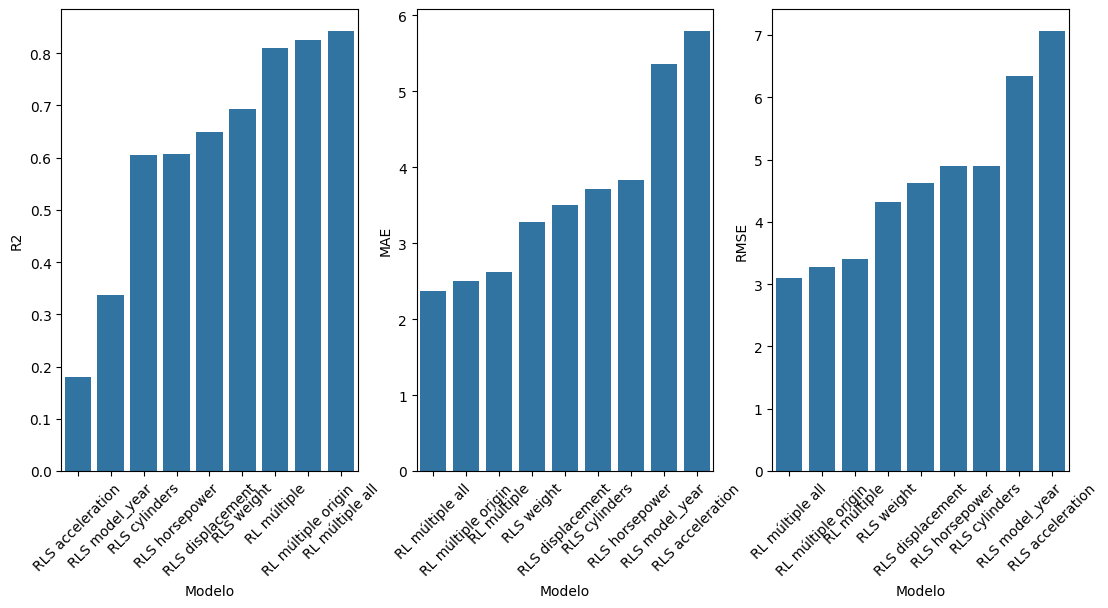

In [20]:
plt.figure(figsize=(13, 6))
plt.subplot(1, 3, 1)
sns.barplot(df_resultados.sort_values('R2'), x='Modelo', y='R2') #interesa valor mas alto
plt.xticks(rotation=45)
plt.subplot(1, 3, 2)
sns.barplot(df_resultados.sort_values('MAE'), x='Modelo', y='MAE') #interesa valor mas bajo
plt.xticks(rotation=45)
plt.subplot(1, 3, 3)
sns.barplot(df_resultados.sort_values('RMSE'), x='Modelo', y='RMSE')
plt.xticks(rotation=45);

In [21]:

# Particionamiento train_test_split 80% 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

model = LinearRegression()

# Entrenamos sobre el 80 % de datos, es decir sobre los datos de entrenamiento
model.fit(X_train, y_train)

# Precedimos sobre el 20 % de datos, es decir, sobre los datos de test que el modelo no conoce
# y_pred son las predicciones que genera el modelo para X_test
y_pred = model.predict(X_test)

# Comparar los valores de y_test (reales) contra las predicciones del modelo y_pred (predicciones) para calcular el error
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)

df_resultados_predictor = pd.DataFrame({
    'Modelo': f'RL múltiple all (test 20 %)',
    'R2': [r2],
    'MAE': [mae],
    'RMSE': [rmse]
})

df_resultados = pd.concat([df_resultados, df_resultados_predictor], ignore_index=True)
df_resultados

,Modelo,R2,MAE,RMSE
0,RLS cylinders,0.604689,3.711287,4.901039
1,RLS displacement,0.648229,3.506273,4.623261
2,RLS horsepower,0.605948,3.827587,4.893226
3,RLS weight,0.692630,3.278702,4.321645
4,RLS acceleration,0.179207,5.795118,7.062126
5,RLS model_year,0.337028,5.355736,6.346968
6,RL múltiple,0.809255,2.618264,3.404434
7,RL múltiple origin,0.824199,2.505389,3.268352
8,RL múltiple all,0.842213,2.369265,3.096376
9,RL múltiple all (test 20 %),0.771595,2.644372,3.414370


Vemos que el modelo de regresión lineal múltiple empeora al predecir sobre datos que nunca ha visto (X_test).

Esto es normal porque el modelo no ha entrenado con esos datos. 

El particionamiento nos ayuda a ver una prueba más realista de cómo se comportaría el modelo ante nuevos datos que no conoce.

Esquema:

* Cargar los datos
* Identificar el tipo de problema de moledado: regresión o clasificación
* Separar datos 
    * Sin particionamiento: X, y 
    * Con particionamiento: X_train, X_test, y_train, y_test
* Preparar datos
* Modelado: usar distintos algoritmos
* Evaluación: métricas de regresión o métricas de clasificación
* Despliegue